<a href="https://colab.research.google.com/github/RMoulla/PTSCV/blob/main/Sentiment_Analysis_Recommandation_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse du sentiment avec le machine learning
Dans ce TP, nous nous intéressons à un problème de classification de textes en utilisant des techniques de machine learning, plus spécifiquement à une tâche d'analyse de sentiments (sentiment analysis).

In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import re

## Chargement des données.

Les données consistent en de commentaires en anglais (mais il y a également du bruit provenant d'autres langues). Ces commentaires peuvent être positifs ou, au contraire, négatifs selon les reviewers.


In [32]:
reviews = pd.read_csv('Reviews.csv')
reviews.head(20)

,product_id,page,page_order,recommended,date,text,hours,compensation,user_id,username,products,found_funny,early_access
0,1006510,1,0,True,25 February,Chinese people didn't like it 'cuz this game p...,6.3,NaN,7.656120e+16,Schmitt,106.0,NaN,False
1,1006510,1,1,False,25 February,I don't recommend this game. I don't care abou...,0.9,NaN,7.656120e+16,cherryliji,1.0,2.0,False
2,1006510,1,2,True,25 February,Deep describing of native Taiwan culture of 19...,1.1,NaN,7.656120e+16,acmonkey233,1.0,NaN,False
3,1006510,1,3,True,25 February,Well at the risk of this review getting buried...,2.9,NaN,7.656120e+16,Khorneflakes!,247.0,NaN,False
4,1006510,1,4,True,25 February,It's not a political satire nor a boring propa...,3.4,NaN,NaN,asadelight,846.0,NaN,False
5,1006510,1,5,True,25 February,Great game from Taiwan!\nIt realistically show...,4.5,NaN,7.656120e+16,s06706s06706,11.0,1.0,False
6,1006510,1,6,True,25 February,I've played Detention before and i was told to...,4.4,NaN,7.656120e+16,Rhodger,175.0,NaN,False
7,1006510,1,7,True,25 February,Nice game,2.2,NaN,7.656120e+16,donychopper,3.0,NaN,False
8,1006510,1,8,True,25 February,definitely the scariest♥♥♥♥♥♥i've ever played,2.8,NaN,7.656120e+16,Mathe,120.0,NaN,False
9,1006510,1,9,True,25 February,"not as horror as i expected, but still a good ...",3.3,NaN,7.656120e+16,hflee1031,2.0,NaN,False


Transformer les labels en entiers.

In [33]:
reviews['recommended'] = reviews['recommended'].astype(dtype=np.int64)
reviews.head()

,product_id,page,page_order,recommended,date,text,hours,compensation,user_id,username,products,found_funny,early_access
0,1006510,1,0,1,25 February,Chinese people didn't like it 'cuz this game p...,6.3,NaN,7.656120e+16,Schmitt,106.0,NaN,False
1,1006510,1,1,0,25 February,I don't recommend this game. I don't care abou...,0.9,NaN,7.656120e+16,cherryliji,1.0,2.0,False
2,1006510,1,2,1,25 February,Deep describing of native Taiwan culture of 19...,1.1,NaN,7.656120e+16,acmonkey233,1.0,NaN,False
3,1006510,1,3,1,25 February,Well at the risk of this review getting buried...,2.9,NaN,7.656120e+16,Khorneflakes!,247.0,NaN,False
4,1006510,1,4,1,25 February,It's not a political satire nor a boring propa...,3.4,NaN,NaN,asadelight,846.0,NaN,False


## Pré-traitement des données


In [34]:
# Fonction qui supprime des caractères spéciaux pour nettoyer les commentaires et réduire le bruit.
def preprocess(text):

    text = text.lower()
    text=re.sub('(\\d|\\W)+',' ', text)
    return text


In [35]:
text = 'Ceci est un Exemple qui contient les chiffres 124 et les caractères !$'
preprocess(text)

'ceci est un exemple qui contient les chiffres 124 et les caractères !$'

In [36]:
reviews['text'] = reviews['text'].apply(lambda x:preprocess(x))
reviews.head(15)

,product_id,page,page_order,recommended,date,text,hours,compensation,user_id,username,products,found_funny,early_access
0,1006510,1,0,1,25 February,chinese people didn't like it 'cuz this game p...,6.3,NaN,7.656120e+16,Schmitt,106.0,NaN,False
1,1006510,1,1,0,25 February,i don't recommend this game. i don't care abou...,0.9,NaN,7.656120e+16,cherryliji,1.0,2.0,False
2,1006510,1,2,1,25 February,deep describing of native taiwan culture of 19...,1.1,NaN,7.656120e+16,acmonkey233,1.0,NaN,False
3,1006510,1,3,1,25 February,well at the risk of this review getting buried...,2.9,NaN,7.656120e+16,Khorneflakes!,247.0,NaN,False
4,1006510,1,4,1,25 February,it's not a political satire nor a boring propa...,3.4,NaN,NaN,asadelight,846.0,NaN,False
5,1006510,1,5,1,25 February,great game from taiwan!\nit realistically show...,4.5,NaN,7.656120e+16,s06706s06706,11.0,1.0,False
6,1006510,1,6,1,25 February,i've played detention before and i was told to...,4.4,NaN,7.656120e+16,Rhodger,175.0,NaN,False
7,1006510,1,7,1,25 February,nice game,2.2,NaN,7.656120e+16,donychopper,3.0,NaN,False
8,1006510,1,8,1,25 February,definitely the scariest♥♥♥♥♥♥i've ever played,2.8,NaN,7.656120e+16,Mathe,120.0,NaN,False
9,1006510,1,9,1,25 February,"not as horror as i expected, but still a good ...",3.3,NaN,7.656120e+16,hflee1031,2.0,NaN,False


<Axes: xlabel='recommended'>

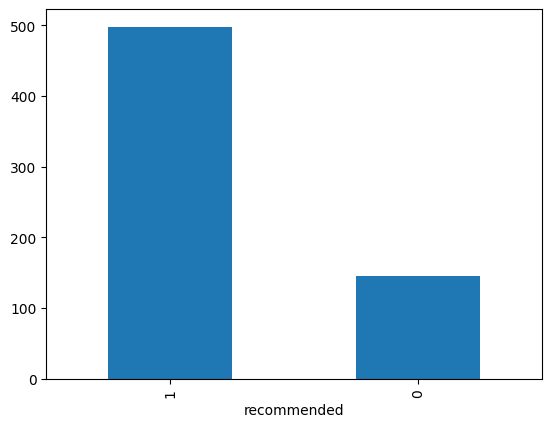

In [37]:
# Visualisation de la variable d'intérêt
reviews['recommended'].value_counts().plot(kind='bar')


## Vectorisation

La vectorisation consiste à transformer les commentaires en vecteurs qui, pour chaque mot, contiennent la fréquence du mots en question dans le commentaire correspondant, sinon 0.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(reviews['text'])
X = vectorizer.transform(reviews['text'])
y = reviews['recommended']

In [39]:
print(vectorizer.get_feature_names_out())

['01' '10' '100' ... '香港可以說特首' '驚人' '點醒我們']


In [40]:
with np.printoptions(threshold=np.inf):
      print(X.toarray()[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Splitting du dataset

D'une manière similaire aux projets de machine learning appliquées aux données tabulaires, on divise le dataset en jeu de données d'entrainement et de test.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

## Modèle de régression logistique

On se propose ici d'implémentaire un modèle de machine learning très simple, de type régression logistique pour avoir une performance de base. Un hyperparamètre de régularisation est optimisé pour obtenir les meilleures performances.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
for c in [0.5, 1, 1.5, 2, 2.5, 3]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train_scaled, y_train)
    print('Accuracy for C=%s: %s'
         % (c, accuracy_score(y_test, lr.predict(X_test_scaled))))

Accuracy for C=0.5: 0.8695652173913043
Accuracy for C=1: 0.8633540372670807
Accuracy for C=1.5: 0.8509316770186336
Accuracy for C=2: 0.8509316770186336
Accuracy for C=2.5: 0.8509316770186336
Accuracy for C=3: 0.8509316770186336


 $$x \rightarrow \frac{x-\bar{x}}{\sigma}$$

Le meilleur modèle est obtenu pour C = ?

In [43]:
final_model = LogisticRegression(C=0.5)
final_model.fit(X_train_scaled, y_train)
print('Final Model Accuracy: %s' %accuracy_score(y_test, final_model.predict(X_test_scaled)))

Final Model Accuracy: 0.8633540372670807


## Analyse des features du modèle

Nous allons maintenant examiner les coefficients de la régression logistique associés aux différents features (tokens).

In [88]:
# Extraire la liste des features
feature_list = vectorizer.get_feature_names_out()

# Extraire la liste des coefficients
coef_list = final_model.coef_[0]

# Associer les features aux coefficients avec un format dictionnaire
feature_to_coef = dict(zip(feature_list, coef_list))

In [92]:
from operator import itemgetter

# Trier par valeur décroissante (mots les plus positifs)
positive_words = sorted(feature_to_coef.items(), key=itemgetter(1), reverse=True)[:10]

print("Positive Words")
for word, coef in positive_words:
    print(word, coef)

Positive Words
very 0.6779739628111938
great 0.5672054512426872
culture 0.42138600975803564
love 0.3983361578802184
way 0.3973867011453835
excellent 0.33863739508521556
awesome 0.29897093209615216
pretty 0.2910712535049428
masterpiece 0.28225947614660124
scary 0.2665002819618674


In [90]:
# Trier par valeur croissante (mots les plus négatifs)
negative_words = sorted(feature_to_coef.items(), key=itemgetter(1))[:10]

print("\nNegative Words")
for word, coef in negative_words:
    print(word, coef)


Negative Words
political -0.7354049943129434
bad -0.6663748500714914
jump -0.6514689677090966
was -0.6287952821098772
wise -0.6122729952876348
independence -0.5656999868330391
he -0.5635103716364058
layers -0.540689305546046
disgusting -0.5208038790072408
close -0.5040425345896198


## Modèle random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8509316770186336


## Modèle Naive Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.8198757763975155


## **Pour aller plus loin**
* Réfléchir sur le prétraitement effectué sur les données.
* Réfléchir sur l'équilibre des classes.

In [94]:
import os
import re
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 1. Charger les données
df = pd.read_csv("Reviews.csv")

# 2. Nettoyage de base
df = df.dropna(subset=["text"])                     # supprimer les lignes sans texte
df = df[df["text"].str.split().str.len() >= 3]      # supprimer les reviews trop courtes (< 3 mots)


print("Taille après nettoyage :", df.shape)

# 3. Prétraitement texte
def preprocess_text(text: str) -> str:
    text = text.lower()                           # passage en minuscules
    text = re.sub(r'[\u4e00-\u9fff]+', ' ', text) # enlève les commentaires en chinois
    return text.strip()

df["text_clean"] = df["text"].astype(str).apply(preprocess_text)

# 4. Préparation X / y
X_text = df["text_clean"].values
y = df["recommended"].astype(int).values  # True -> 1, False -> 0

# stopwords personnalisés : on garde la négation
custom_stopwords = list(set(ENGLISH_STOP_WORDS) - {"not", "no", "never"})

# 5. vectorisation TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),          # utiliser unigrams + bigrams
    min_df=3,                    # ignorer les mots trop rares
    max_df=0.9,                  # ignorer les mots trop fréquents
    stop_words=custom_stopwords  # stopwords perso (avec négation conservée)
)


X_tfidf = tfidf.fit_transform(X_text)
print("Taille matrice TF-IDF :", X_tfidf.shape)

# 6. Division du dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                                              # matrice TF-IDF en entrée
    y,                                                    # labels (0/1)
    test_size=0.2,                                        # 80% des données pour le train et 20% pour le test
    random_state=42,                                      # graine fixe pour reproduire le même split
    stratify=y                                            # préserver la même proportion de classes dans train et test
)


# 7. Modèle : Régression Logistique
model = LogisticRegression(
    C=0.5,                    # paramètre de régularisation (plus petit = régularisation plus forte)
    class_weight="balanced"   # rééquilibre l'importance des classes rares pendant l'entraînement
)

model.fit(X_train, y_train)

# 8. Évaluation
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("\nAccuracy :", acc)

# 9. Fonction pratique pour prédire sur un nouveau texte
def predict_sentiment(review: str):
    review_clean = preprocess_text(review)
    X_review = tfidf.transform([review_clean])
    proba = model.predict_proba(X_review)[0]
    label = model.predict(X_review)[0]
    return {
        "label": int(label),               # 1 = positif, 0 = négatif
        "proba_negatif": float(proba[0]),
        "proba_positif": float(proba[1])
    }

# Exemple
example = "I really love this game, amazing story and characters!"
print("\nExemple prédiction :")
print(example, "->", predict_sentiment(example))


Taille après nettoyage : (567, 13)
Taille matrice TF-IDF : (567, 1890)

Accuracy : 0.9210526315789473

Exemple prédiction :
I really love this game, amazing story and characters! -> {'label': 1, 'proba_negatif': 0.30246892585079277, 'proba_positif': 0.6975310741492072}


### Fonction loss non pondérée
$$\
\mathcal{L}(\beta)= \sum_{i=1}^{N} y_i \log p_i
+
(1-y_i)\log(1-p_i)
$$

### Fonction loss pondérée
$$\
\mathcal{L}(\beta)= \sum_{i=1}^{N} w_{y_i}\Big[y_i \log p_i
+
(1-y_i)\log(1-p_i)
\Big]
$$

où


$$w_0 = \frac{N}{2N_0}$$

$$w_1 = \frac{N}{2N_1}$$